(content:chapter:mesh)=

# Mesh Analysis

We ofter refer to mesh analysis as a _method_ of analysis as that is the goal of this analysis, to perform it methodically. As mentioned in the previous chapter, many folks choose to analyze circuits by haphazardly applying a combination of the fundamental laws, equivalent components, and the divider equations in order to find a single value of interest. Mesh analysis is organized and consistent when performed correctly. Furthermore, once we find the unknowns, we can use them to find any other value of interest in the circuit.

## Relating Circuit Values to Mesh Currents

The unknowns in this case are the currents flowing around each mesh of the circuit. Let's take a step back and first use the mesh current to find expressions for other values in the circuit. It's a bit of make-believe to begin with but it will help as we develop the method. Let's pretend we already know the mesh currents and want to use them to determine other currents and voltages in the circuit.

### Currents

Let's start with the circuit shown here

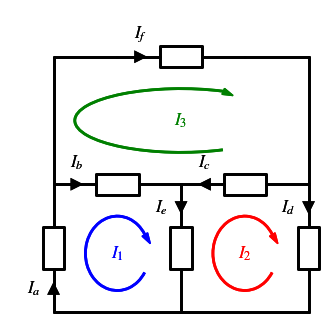

In [1]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='using-mesh-currents.svg') as d:
    d += (R1 := elm.RBox().up())
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_a$')
    d += (R2 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_b$')
    d += (R3 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='out').at(R3).label('$I_c$')
    d += (R4 := elm.RBox().down())
    d += elm.CurrentLabelInline(direction='in').at(R4).label('$I_d$')
    d += (R5 := elm.RBox().down().at(R2.end))
    d += elm.CurrentLabelInline(direction='in').at(R5).label('$I_e$')
    d += (LB := elm.Line().at(R1.start).right().tox(R4.end))
    d += (LL := elm.Line().at(R1.end).up())
    d += elm.Line().right().tox(R2.center)
    d += (R6 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R6).label('$I_f$')
    d += elm.Line().right().tox(R4.end)
    d += (LR := elm.Line().down().toy(R4.start))
    d += elm.LoopCurrent([R2,R5,LB,R1],pad=0.5).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LB,R5],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R6,LR,R2,LL],pad=0.5).label('$I_3$').color('green')

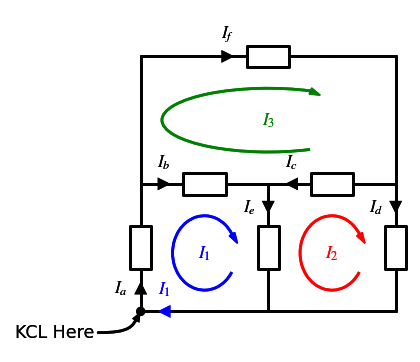

In [2]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='find-Ia.svg') as d:
    d += elm.Dot()
    d += (R1 := elm.RBox().up())
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_a$')
    d += (R2 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_b$')
    d += (R3 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='out').at(R3).label('$I_c$')
    d += (R4 := elm.RBox().down())
    d += elm.CurrentLabelInline(direction='in').at(R4).label('$I_d$')
    d += (R5 := elm.RBox().down().at(R2.end))
    d += elm.CurrentLabelInline(direction='in').at(R5).label('$I_e$')
    d += (LB := elm.Line().at(R1.start).right().tox(R5.end))
    d += elm.CurrentLabelInline(direction='out').at(LB).label('$I_1$').color('blue')
    d += (LBR := elm.Line().at(R5.end).right().tox(R4.end))
    d += (LL := elm.Line().at(R1.end).up())
    d += elm.Line().right().tox(R2.center)
    d += (R6 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R6).label('$I_f$')
    d += elm.Line().right().tox(R4.end)
    d += (LR := elm.Line().down().toy(R4.start))
    d += elm.LoopCurrent([R2,R5,LB,R1],pad=0.5).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LB,R5],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R6,LR,R2,LL],pad=0.5).label('$I_3$').color('green')
    d += elm.Annotate().at(R1.start).delta(dx=-1, dy=-.5).label('KCL Here')

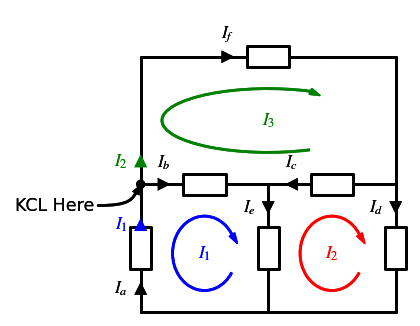

In [3]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='find-Ib.svg') as d:
    d += (R1 := elm.RBox().up())
    d += elm.Dot()
    d += elm.CurrentLabelInline(direction='in').at(R1.end).label('$I_1$').color('blue')
    d += elm.CurrentLabelInline(direction='in').at(R1).label('$I_a$')
    d += (R2 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R2).label('$I_b$')
    d += (R3 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='out').at(R3).label('$I_c$')
    d += (R4 := elm.RBox().down())
    d += elm.CurrentLabelInline(direction='in').at(R4).label('$I_d$')
    d += (R5 := elm.RBox().down().at(R2.end))
    d += elm.CurrentLabelInline(direction='in').at(R5).label('$I_e$')
    d += (LB := elm.Line().at(R1.start).right().tox(R5.end))
    d += (LBR := elm.Line().at(R5.end).right().tox(R4.end))
    d += (LL := elm.Line().at(R1.end).up())
    d += elm.CurrentLabelInline(direction='in').at(LL).label('$I_2$').color('green')
    d += elm.Line().right().tox(R2.center)
    d += (R6 := elm.RBox().right())
    d += elm.CurrentLabelInline(direction='in').at(R6).label('$I_f$')
    d += elm.Line().right().tox(R4.end)
    d += (LR := elm.Line().down().toy(R4.start))
    d += elm.LoopCurrent([R2,R5,LB,R1],pad=0.5).label('$I_1$').color('blue')
    d += elm.LoopCurrent([R3,R4,LB,R5],pad=0.5).label('$I_2$').color('red')
    d += elm.LoopCurrent([R6,LR,R2,LL],pad=0.5).label('$I_3$').color('green')
    d += elm.Annotate().at(R1.end).delta(dx=-1, dy=-.5).label('KCL Here')

```{figure} using-mesh-currents.svg
---
height: 300px
name: using-mesh-currents
---
```

The unknown mesh currents ($I_1$, $I_2$, and $I_3$) are marked and labeled. The directions can be arbitrary. We'll start with all of the mesh currents labeled in the clockwise direction.

`````{admonition} Examples
Find expressions for the currents labeled $I_a$, $I_b$, and $I_c$ in terms of the mesh currents

````{admonition} Find $I_a$ using KCL
:class: tip, dropdown
In each case we are writing a KCL equation in order to find these expressions.  While I do not write these explicitly when analyzing circuits,  it is worthwhile to see that this is simply an application of one of the fundamental laws.

To find an expression for $I_a$ let's consider a point in the circuit below the current arrow for $I_a$.
```{figure} find-Ia.svg
---
height: 300px
name: find-ia
---
```
I've also added a current arrow for $I_1$ along the bottom of the mesh.  We often label the meshes inside as we had done previously but we have to think of that mesh current as flowing through the elements on the perimeter of the mesh.

Writing the KCL equation for the indicated point in the circuit gives us

$$
-I_a+I_1=0
$$

which we solve for $I_a$

$$
I_a=I_1
$$
````
````{admonition} Find $I_a$ quickly and accurately
:class: tip, dropdown
I usually write these without considering a point in the circuit at which to write a KCL.  There is a much simpler way to get to an equivalent equation.  I consider each mesh current in turn and ask myself these questions:
1. Does the mesh current touch the current arrow for $I_a$?
2. If it does, does it go in the same or opposite direction?

The answers to these questions determine:
1.  Whether the mesh current is included as a term in the expression and
2.  The sign of the term if it is included

In this instance $I_1$ is the only current that touches $I_a$ which means it is the only term in the expression for $I_a$.  $I_1$ flows in the same direction as $I_a$ making that term positive.  Stop and look at the original schematic and make sure you can clearly identify both answers that lead to the expression

$$
I_a=I_1
$$

This is the simplest form a current can take but the approach is consistent for all currents we find using mesh currents.
````
````{admonition} Find $I_b$ using KCL
:class: tip, dropdown
To find an expression for $I_b$ let's consider a point in the circuit below as indicated.
```{figure} find-Ib.svg
---
height: 300px
name: find-ib
---
```
Writing the KCL equation for the indicated point in the circuit gives us

$$
I_1-I_b-I_2=0
$$

which we solve for $I_b$

$$
I_b=I_1-I_2
$$
````
````{admonition} Find $I_b$ quickly and accurately
:class: tip, dropdown
1. Does the $I_1$ touch $I_b$? Yes.  Does it travel in the same or opposite direction?  Same.  Therefore, add a $+I_1$ to the expression for $I_b$.
2. Does the $I_2$ touch $I_b$? Yes.  Does it travel in the same or opposite direction?  Opposite.  Therefore, add a $-I_2$ to the expression for $I_b$.
3. Does the $I_3$ touch $I_b$? No.  Therefore, there is no $I_3$ term in the expression for $I_b$.

Altogether we can write the expression for $I_b$ as

$$
I_b=I_1-I_2
$$
````


`````

## Our First Toy Problem

Applying the fundamental laws (Ohm's, KVL, KCL) in the haphazard manner demonstrated in Section \ref{sec_MacGyver} leaves the desire for a more methodical approach to circuit analysis. The first of the two methods considered here is Mesh Analysis. We should build off of a simple example as we explore Mesh Analysis. The first example in this section is solvable using previous methods but will serve to increase our confidence in the new method.
\begin{example}
Find $V_A$\par
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l=$V_S$~~21~V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$~~24~\Om] (3,0)
(3,3) to[resistor,l=$R_3$~~14~\Om] (6,3)
(6,3) to[resistor,l=$R_4$~~10~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
;
\end{circuitikz}\end{center}

\Solution
Using previous methods we can find the current leaving the positive terminal of the source, $I_S$, by reducing the resistor network. Note that $R_3$ and $R_4$ are in series.
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l=$V_S$~~21~V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$~~24~\Om] (3,0)
(3,3) -- (6,3)
(6,3) to[resistor,l=$R_3$+$R_4$~~24~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
;
\end{circuitikz}\end{center}
Next note that the combination $R_3$+$R_4$ is in parallel with $R_2$. Combining those resistances yields:
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_S$~~21~V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=($R_3$+$R_4$)$\|$$R_2$~~12~\Om] (3,0)
(3,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
;
\end{circuitikz}\end{center}
Now we must notice that the two resistors are in series with a voltage supply. In this case the voltage divider is used to find $V_A$
\[
V*A=V_S\left[\frac{(R*{3}+R*{4})\|R*{2}}{((R*{3}+R*{4})\|R*{2})+R*{1}}\right]=21V\left[\frac{12~\Omega}{12~\Omega+6~\Omega}\right]=14~\text{V}
\]
\end{example}
Let's keep this result in mind for the next few sections

## The Steps

I'm going to list the steps here as reference. Use these steps as we walk through the next example.
\begin{framed}
\Large\textbf{Steps for Mesh Analysis}\normalsize
\begin{enumerate}
\item Assign mesh currents. Identify any ``Super-meshes'' (We'll discuss what a super-mesh is later).
\item Use KVL on each mesh current.
\item Use Ohm's law to express the resistor voltages in terms of mesh currents.
\item Distribute and group like terms.
\item Plug in values and solve the system.
\end{enumerate}
\end{framed}

Let's apply these steps to the previous example:
\begin{example}
Find $V_A$ using Mesh Analysis\par
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_S$~~21V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$~~24\Om] (3,0)
(3,3) to[resistor,l=$R_3$~~14~\Om] (6,3)
(6,3) to[resistor,l=$R_4$~~10~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
;
\end{circuitikz}\end{center}

\Solution
Step 1 states that we should assign mesh currents. First we identify the two meshes in this circuits. There are no super-meshes in this circuit. We'll see what that means as the examples in this section progress. Each mesh gets a current direction assigned to it, clockwise or counter-clockwise. Direction doesn't matter for now, you get to pick. If the current is actually flowing the opposite direction your answer will have a negative sign. Let's start with both mesh currents flowing in the clockwise (CW) direction.
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_S$~~21V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~14~\Om] (6,3)
(6,3) to[resistor,l=$R_4$~~10~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(3.6,.9) node[above]{24\Om}
;

% %\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
% %\draw[red,thick] (1.5,1.5) node{$I_1$};
%%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%%\draw[blue,thick] (4.5,1.5) node{$I_2$};
\end{circuitikz}\end{center}
In Step 2 we use KVL on each mesh. I find it useful to mark each resistor with the polarity corresponding to the mesh I'm currently working on. It is possible, as we see here with $R_2$, that a resistor will have the opposite polarity when considering the first mesh than it will when considering the second mesh. We can mark the polarities with the mesh with the corresponding current. Passive sign convention should be observed to label the polarities correctly for the passive (resistors here) components.
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_S$~~21V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~14~\Om] (6,3)
(6,3) to[resistor,l=$R_4$~~10~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(3.6,.9) node[above]{24\Om}
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%%\draw[red,thick] (1.5,1.5) node{$I_1$}
(1,3) node[below]{+}
(2.25,3) node[below]{-}
(2.75,2.5) node[below]{+}
(2.75,1) node[below]{-};
%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%\draw[blue,thick] (4.5,1.5) node{$I_2$}
(4,3) node[below]{+}
(5.25,3) node[below]{-}
(3.25,2.5) node[below]{-}
(3.25,1) node[below]{+}
(5.75,2.5) node[below]{+}
(5.75,1) node[below]{-};
\end{circuitikz}\end{center}
Following the colors of the mesh currents in the schematics the two KVL equations are
\begin{eqnarray*}\color{red}
V*S-V*{R1}-V*{R2}=0\\
\color{blue}
-V*{R2}-V*{R3}-V*{R4}=0
\end{eqnarray*}
Step 3 calls for the resistor voltages to be replaced using Ohm's law. Given the mesh currents and the resistances we can express 3 of the voltages this way:
\begin{eqnarray*}
V*{R1}&=&I*1R_1\\
V*{R3}&=&I*2R_3\\
V*{R4}&=&I_2R_4\\
\end{eqnarray*}
The three resistors listed above only have a single mesh current flowing through them. The final voltage drop is that across $R_2$. Since this voltage appears in both meshes it is important to keep the positive current direction correct as each individual KVL equation is considered. When writing the equation for the first mesh $I_1$ indicates the positive current direction. Likewise, when writing the equation for the second mesh $I_2$ indicates the positive current direction. We must then write $V*{R2}$ differently for each KVL as we see here:
\begin{eqnarray*}\color{red}
V*{R2}=(I*1-I_2)R_2\\
\color{blue}
V*{R2}=(-I_1+I_2)R_2\\
\end{eqnarray*}
All of the necessary voltages are now expressed in terms of the unknown mesh currents, $I_1$ and $I_2$. Substituting these into the KVL equations taking care to preserve the signs of each term yields:
\begin{eqnarray*}\color{red}
V_S-I_1R_1-(I_1-I_2)R_2=0\\
\color{blue}
-(-I_1+I_2)R_2-I_2R_3-I_2R_4=0
\end{eqnarray*}
Step 4 calls for a bit of algebra practice but distributing where appropriate yields:
\begin{eqnarray*}\color{red}
V_S-I_1R_1-I_1R_2+I_2R_2=0\\
\color{blue}
I_1R_2-I_2R_2-I_2R_3-I_2R_4=0
\end{eqnarray*}
Collecting terms gives us:
\begin{eqnarray*}\color{red}
V_S-I_1(R_1+R_2)+I_2R_2=0\\
\color{blue}
I_1R_2+I_2(-R_2-R_3-R_4)=0
\end{eqnarray*}
Rearranging this to look like the linear systems reviewed in Section \ref{sec*linearSystems}
\begin{eqnarray*}\color{red}
(R_1+R_2)I_1-R_2I_2=V_S\\
\color{blue}
R_2I_1+(-R_2-R_3-R_4)I_2=0
\end{eqnarray*}
Which leads us to Step 5, plugin values and solve the system.
\begin{eqnarray*}\color{red}
(6~\Omega+24~\Omega)I_1-24~\Omega I_2=21~\text{V}\\
\color{blue}
24~\Omega I_1+(-24~\Omega-14~\Omega-10~\Omega)I_2=0~\text{V}
\end{eqnarray*}
or
\begin{eqnarray*}\color{red}
30~\Omega I_1-24~\Omega I_2=21~\text{V}\\
\color{blue}
24~\Omega I_1-48~\Omega I_2=0~\text{V}
\end{eqnarray*}
In matrix form this looks like
\[ \left[ \begin{array}{cc}
30~\Omega&-24~\Omega\\
24~\Omega&-48~\Omega\\
\end{array} \right]\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}21~\text{V}\\0~\text{V}\end{array}\right]\]
and solving for the currents gives us
\[ \left[ \begin{array}{cc}
30~\Omega&-24~\Omega\\
24~\Omega&-48~\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}21~\text{V}\\0~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}1.167~\text{A}\\583.3~\text{mA}\end{array}\right]\]
Even after all of this we still haven't found what we were asked to, $V_A$. We can do that using the expression for $V*{R2}$ discussed in this example, but which one? $V_A$ is the voltage at node A with reference to ground. Following the passive sign convention in this case the positive current direction is down through the resistor. Therefore, the voltage, $V_A$ is found with
\[
V*A=(I_1-I_2)R_2=(1.167~\text{A}-583.3~\text{mA})24~\Omega=14~\text{V}
\]
\end{example}
Why on earth would we go through all of that when we have already solved this problem in a simpler manner?
\begin{enumerate}
\item These steps can be applied in general. The previous method depended on your clever mind to find a path to the answer. As circuits become more complex finding that path can become more convoluted and therefore more prone to error.
\item Until now we have been limited to analyzing circuits with a single source. Mesh analysis can be applied regardless of the number of sources in the circuit.
\item Once you have calculated the mesh currents you can easily revisit the circuit and find any value of interest.
\end{enumerate}
Consider the next example that uses the same circuit. If we were later asked to analyze the circuit for$V_B$ we may have to perform the analysis again with a different goal. Using the previously calculated mesh currents it is a trivial matter to find the value.
\begin{example}
Find$V_B$ given $I_1$=1.167~A and $I_2$=583.3~mA.
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l*=$V_S$~~21V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~14~\Om] (6,3)
(6,3) to[resistor,l=$R_4$~~10~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(6,3) node[above]{$V*{B}$}
(3.6,.9) node[above]{24\Om}
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%%%\draw[red,thick] (1.5,1.5) node{$I_1$};
%%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%%\draw[blue,thick] (4.5,1.5) node{$I_2$};
\end{circuitikz}\end{center}

\Solution
We can see from the diagram that$V_B$ is equivalent to the voltage across $R_4$. Furthermore, we can see that $I_2$ flows in the positive direction according to the passive sign convention. Therefore,$V_B$ is simply
\[V_B=I_2R_4=(583.3~\text{mA})(10~\Omega)=5.833\text{V}\]

\end{example}

## Mesh Analysis with Multiple Sources

I mentioned before that mesh analysis can be used to analyze circuits with multiple sources. The same steps are applied with no alteration. Let's look at a quick example
\begin{example}
Find $V_A$
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_{S1}$~~12V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~12\Om] (6,3)
(6,3) to[battery,l^=$V_{S2}$~~8V] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(3.6,.9) node[above]{12\Om}
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%%\draw[red,thick] (1.5,1.5) node{$I_1$}
(1,3) node[below]{+}
(2.25,3) node[below]{-}
(2.75,2.5) node[below]{+}
(2.75,1) node[below]{-};
%\centerarc[blue,<-,thick](4.5,1.5)(225:-45:5mm)
%\draw[blue,thick] (4.5,1.5) node{$I_2$}
(4,3) node[below]{-}
(5.25,3) node[below]{+}
(3.25,2.5) node[below]{+}
(3.25,1) node[below]{-};
\end{circuitikz}\end{center}

\Solution
Step 1 was already taken care of above. Notice that here the first mesh current is flowing CW and the second is flowing counter-clockwise (CCW). In this case the currents through $R_2$ are flowing in the same direction and therefore the polarities are identical. This will result in $V_{R2}$ having the same sign regardless of which mesh is being analyzed.

The polarities are also already marked for Step 2. The KVL equations are
\begin{eqnarray*}\color{red}
V*{S1}-V*{R1}-V*{R2}=0\\
\color{blue}
V*{S2}-V*{R2}-V*{R3}=0
\end{eqnarray*}
Using Ohm's Law for Step 3 give us:
\begin{eqnarray*}\color{red}
V*{S1}-I_1R_1-(I_1+I_2)R_2=0\\
\color{blue}
V*{S2}-(I_1+I_2)R_2-I_2R_3=0
\end{eqnarray*}
Distributing and grouping terms as prescribed in Step 4 results in
\begin{eqnarray*}\color{red}
(R*1+R_2)I_1+R_2I_2=V*{S1}\\
\color{blue}
R*2I_1+(R_2+R_3)I_2=V*{S2}
\end{eqnarray*}
and after substituting values
\begin{eqnarray*}\color{red}
18\Omega I_1+12\Omega I_2=12~\text{V}\\
\color{blue}
12\Omega I_1+24\Omega I_2=8~\text{V}
\end{eqnarray*}
Solving this linear system using matrices gives us the two mesh currents
\[ \left[ \begin{array}{cc}
18\Omega&12\Omega\\
12\Omega&24\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}12V\\8V\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}\sfrac{2}{3}~\text{A}\\0~\text{A}\end{array}\right]\]
Finally solving for $V_A$
\[V_A=(I_1+I_2)R_2=(\sfrac{2}{3}~\text{A})(12\Omega)=8~\text{V}\]
Again, $I_1$ and $I_2$ have a positive direction that agrees with the polarity of $V_A$ as dictated by the passive sign convention. This can be seen mathematically in the equation directly above in the signs of the two currents, both positive.
\end{example}

A quick side note: Ohm's law can be seen if we examine the contents of the linear system in matrix form. The 2x2 matrix contains only resistances. The vector of unknowns contains currents. The vector of constants contains voltages. Considering that the matrix is inverted we can see that
\[ \underbrace{\left[ \begin{array}{cc}
18\Omega&12\Omega\\
12\Omega&24\Omega\\
\end{array} \right]^{-1}}_{\boldsymbol{R}^{-1}}\underbrace{\left[\begin{array}{c}12~\text{V}\\8~\text{V}\end{array}\right]}_{\boldsymbol{V}}=\underbrace{\left[\begin{array}{c}I_1\\I_2\end{array}\right]}\_{\boldsymbol{I}}=\left[\begin{array}{c}\sfrac{2}{3}~\text{A}\\0~\text{A}\end{array}\right]\]
or simply a matrix form of Ohm's Law
\[\boldsymbol{VR}^{-1}=\frac{\boldsymbol{V}}{\boldsymbol{R}}=\boldsymbol{I}\]

More complex circuits might have additional meshes. Mesh analysis can be applied in these cases simply by adding additional mesh currents and additional corresponding KVL equations.
\begin{example}
Find $V_{O}$ using mesh analysis.
\begin{center}\begin{circuitikz}\draw
(0,0) to[resistor,l=$R_1$~~9k\Om] (0,3)
(3,3) to[battery,l_=$V_{1}$~~6V] (0,3)
(0,6) to[resistor,l=$R_2$~~4k\Om] (6,6)
(3,3) to[resistor,l=$R_3$] (3,0)
(3,3) to[resistor,l=$R_4$~~6k\Om] (6,3)
(6,3) to[resistor,l=$R_5$~~12k\Om] (6,0)
(6,0) -- (0,0)
(0,3) -- (0,6)
(6,6) -- (6,3)
(3.6,1.4) node[below]{6k\Om}
(4,4) node[below]{-}
(5.25,4) node[below]{+}
(4.6,4.25) node[below]{$V_{O}$}
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%%\draw[red,thick] (1.5,1.5) node{$I_1$}
(2.75,2.5) node[below]{+}
(2.75,1) node[below]{-}
(.25,2.5) node[below]{-}
(.25,1) node[below]{+};
%%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%%\draw[blue,thick] (4.5,1.5) node{$I_2$}
(4,3) node[below]{+}
(5.25,3) node[below]{-}
(3.25,2.5) node[below]{-}
(3.25,1) node[below]{+}
(5.75,2.5) node[below]{+}
(5.75,1) node[below]{-};
%%\centerarc[orange,->,thick](3,4.5)(225:-45:5mm)
%%\draw[orange,thick] (3,4.5) node{$I_{3}$}
(2.5,5.75) node[below]{+}
(3.75,5.75) node[below]{-};
\end{circuitikz}\end{center}

\Solution
\vspace{2mm}
\textbf{KVL Equations:}
\begin{eqnarray*}\color{red}
-V*{R1}+V*1-V*{R3}=0\\
\color{blue}
-V*{R3}-V*{R4}-V*{R5}=0\\
\color{orange}
-V*{R2}-V\_{R4}-V_1=0
\end{eqnarray*}
\textbf{Substituting with Ohm's Law}
\begin{eqnarray*}\color{red}
-I_1R_1+V_1-(I_1-I_2)R_3=0\\
\color{blue}
-(I_2-I_1)R_3-(I_2-I_3)R_4-I_2R_5=0\\
\color{orange}
-I_3R_2-(I_3-I_2)R_4-V_1=0
\end{eqnarray*}
\textbf{Grouping Like-terms}
\begin{eqnarray*}\color{red}
(-R_1-R_3)I_1+R_3I_2=-V_1\\
\color{blue}
R_3I_1+(-R_3-R_4-R_5)I_2+R_4I_3=0\\
\color{orange}
R_4I_2+(-R_2-R_4)I_3=V_1
\end{eqnarray*}
\textbf{Substituting and Solving}
\begin{eqnarray*}\color{red}
-15k\Omega I_1+6k\Omega I_2=-6~\text{V}\\
\color{blue}
6k\Omega I_1-24k\Omega I_2+6k\Omega I_3=0\\
\color{orange}
6k\Omega I_2-10k\Omega I_3=6~\text{V}
\end{eqnarray*}
Solve using matrices:
\[ \left[ \begin{array}{ccc}
-15~\text{k}\Omega&6~\text{k}\Omega&0~\Omega\\
6~\text{k}\Omega&-24~\text{k}\Omega&6~\text{k}\Omega\\
0~\Omega&6~\text{k}\Omega&-10~\text{k}\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}-6~\text{V}\\0~\text{V}\\6~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]=\left[\begin{array}{c}373.33~\mu\text{A}\\-66.67~\mu\text{A}\\-640.00~\mu\text{A}\end{array}\right]\]
Finally solving for $V*{O}$
\[V_O=(I_3-I_2)R_4=(-640.00~\mu\text{A}+66.67~\mu\text{A})6~\text{k}\Omega=-3.44\text{V}\]

\end{example}

## Current Sources in Mesh Current

KVL equations are the default when performing Mesh analysis. There are cases where you are unable to write enough KVL equations to form a fully-determined system of equations. Those cases can be easily recognized if we look for current supplies.

Each term in a KVL must be a voltage. Those voltages must be rewritten to be in terms of the unknown mesh currents. This is possible with resistors using Ohm's law. When current supplies are present we cannot readily represent the voltage across that current supply in terms of the unknown mesh currents. So how do we approach current supplies when performing Mesh analysis?

Since we cannot write a KVL for a mesh when it contains a current supply, we must write a KCL instead. The goal remains to write the same number of equations as we have unknowns in order to find a unique solution for those unknowns. So, for each current supply (dependent or independent) we write a KCL. The remainder of the equations we need to equal the number of unknowns are then KVL equations written in the usual way.

Let's examine two cases of circuits that have current supplies and perform Mesh analysis on them.

### Current Sources with a Single Mesh Current

The first case is a current supply that is only affected by a single mesh current. But before we write the KCL for that current supply consider the types and quantities of equations that you will write to find the unknown mesh currents. For each current supply write a KCL equation, only one in the case if the next example. A total of 2 equations are required since we have two unknown mesh currents. That leaves 1 KVL to have a fully-determined system.

\begin{example}
Determine the mesh currents.
\begin{center}\begin{circuitikz}\draw
(0,3) to[voltage source,lx_={$V_S$ and 10~V}] (0,0)
(0,3) to[resistor,lx={$R_1$ and \raisebox{1ex}{4~\Om}}] (3,3)
(3,3) to[resistor,lx={$R_2$ and 6~\Om}] (3,0)
(3,3) to[resistor,lx={$R_3$ and \raisebox{1ex}{3~\Om}}] (6,3)
(6,0) to[current source,lx_={$I_S$ and 5~A}] (6,3)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
;
\end{circuitikz}\end{center}
\Solution
Before we begin the analysis let's summarize what equations we'll be writing:
\begin{center}
\begin{tabular}{rrc}
&1&KCL\\
+&1&KVL\\
\hline
&2&Unknowns\\
\end{tabular}
\end{center}
Now let's follow the steps.
Label Mesh currents and polarities of passive components:
\begin{center}\begin{circuitikz}\draw
(0,3) to[voltage source,lx_={$V_S$ and 10~V}] (0,0)
(0,3) to[resistor,lx={$R_1$ and \raisebox{1ex}{4~\Om}}] (3,3)
(3,3) to[resistor,lx={$R_2$ and 6~\Om}] (3,0)
(3,3) to[resistor,lx={$R_3$ and \raisebox{1ex}{3~\Om}}] (6,3)
(6,0) to[current source,lx_={$I_S$ and 5~A}] (6,3)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(1.5,1.5) node[red,thick]{$I_1$}
(4.7,1.5) node[blue,thick]{$I_2$}
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%%\centerarc[blue,->,thick](4.7,1.5)(225:-45:5mm)
%%\draw[red,thick] (2.75,2.5) node[below]{+}
(2.75,1) node[below]{-}
%(.25,2.5) node[below]{-}
%(.25,1) node[below]{+}
(1,3) node[below]{+}
(2.25,3) node[below]{-}
;
%\draw[blue,thick] (4,3) node[below]{+}
(5.25,3) node[below]{-}
(3.25,2.5) node[below]{-}
(3.25,1) node[below]{+}
% (5.75,2.5) node[below]{+}
% (5.75,1) node[below]{-}
;
\end{circuitikz}\end{center}
Now let's set about writing the equations. Let's consider which mesh currents flow through the current supply in order to write the KCL equation. In this case the 5~A supply is only part of the second mesh and therefore is only affected by $I_2$. The direction of the mesh current must also be considered. Since $I_2$ opposes the direction of the 5~A supply (they flow in opposite directions) one will be the negative of the other. We describe this as:
\[\color{blue} I_2=-5~\text{A}\]
or its mathematical equivalent:
\[\color{blue} -I_2=5~\text{A}\color{black}\]%Attempt to stop the example box being blue seems to work.
Either of these is suitable to be included in the system of equations that describe this circuit.

The second equation is a KVL. The only suitable mesh for a KVL equation is the left mesh ($I_1$).
\begin{eqnarray*}\color{red}
\color{red} V*S-V*{R1}-V*{R2}=0\\
\color{red} V*{R1}+V\_{R2}=V_S\\
\color{red} I_1R_1+(I_1-I_2)R_2=V_S\\
\color{red} (R_1+R_2)I_1-R_2I_2=V_S
\end{eqnarray*}
The last equation in the sequence above is suitable for inclusion in the system of equations that describe this circuit.

\begin{eqnarray*}\color{red}
10~\Omega I_1-6~\Omega I_2=10~\text{V}\\
\color{blue}
-I_2=5~\text{A}\\
\end{eqnarray*}
Solve using matrices:
\[ \left[ \begin{array}{cc}
10&-6\\
0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}10\\5\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-2~\text{A}\\-5~\text{A}\end{array}\right]\]

\end{example}

### Current Sources with Multiple Mesh Currents

The case of current supplies that are affected by multiple mesh currents varies only slightly from the previous example where a current supply is affected by a single mesh current. We still write a KCL for this current supply. The change comes while writing the KVL. Neither of the individual meshes will allow you to write a KVL in terms of the unknown mesh currents since both meshes contain the current supply. Therefore you will have to write the KVL around the two meshes taken together. Recall that Kirchhoff stated that the algebraic sum of voltages around a \textbf{\underline{loop}} is zero. The path around the two meshes taken together is a loop and the voltages will sum to zero.

\begin{example}
Determine the mesh currents
\begin{center}\begin{circuitikz}\draw
(0,4) to[voltage source,lx={$V_S$ and 20~V}] (0,0)
(0,4) to[resistor,lx={$R_1$ and \raisebox{1ex}{6~\Om}}] (3,4)
(3,4) to[resistor,lx={$R_2$ and 2~\Om}] (3,2)
(3,0) to[current source,lx={$I_S$ and 6~A}] (3,2)
(3,4) to[resistor,lx={$R_3$ and \raisebox{1ex}{10~\Om}}] (6,4)
(6,0) to[R,lx_={$R_4$ and 4~\Om}] (6,4)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(1.8,2.5) node[red,thick]{$I_1$}
(4.7,1) node[blue,thick]{$I_2$}
;
%%\centerarc[red,->,thick](1.8,2.5)(225:-45:5mm)
%%\centerarc[blue,->,thick](4.7,1)(225:-45:5mm)

    %\draw[red,thick] 	 (2.75,3.8) node[below]{+}
    							 (2.75,2.3) node[below]{-}
    							 (1,4) node[below]{+}

(2.25,4) node[below]{-}
;
%\draw[blue,thick] (4,4) node[below]{+}
(5.25,4) node[below]{-}
(3.25,3.8) node[below]{-}
(3.25,2.3) node[below]{+}
(5.75,3) node[below]{+}
(5.75,1.4) node[below]{-}
;
\end{circuitikz}\end{center}
\Solution
Considering the number and types of equations to be written given the one current supply and two meshes:
\begin{center}
\begin{tabular}{rrc}
&1&KCL\\
+&1&KVL\\
\hline
&2&Unknowns\\
\end{tabular}
\end{center}
Two meshes contain the current supply, $I_1$ and $I_2$. Each is considered in turn with respect to the current direction. $I_1$ flows against the supply and will therefore be negative. $I_2$ flows with the current supply and therefore will be positive.
\[-I*1+I_2=6~\text{A}\]
The KVL is then written using the loop around both meshes
\begin{eqnarray\*}
V_S-V*{R1}-V*{R3}-V*{R4}=0\\
V_S-I_1R_1-I_2R_3-I_2R_4=0\\
-R_1I_1-R_3I_2-R_4I_2=-V_S\\
-R_1I_1+(-R_3-R_4)I_2=-V_S\\
\end{eqnarray*}
Plug in values:
\begin{eqnarray*}
-6I_1-14I_2=-20~\text{V}\\
\end{eqnarray\*}
Solve using matrices:
\[ \left[ \begin{array}{cc}
-1&1\\
-6&-14\\
\end{array} \right]^{-1}\left[\begin{array}{c}6\\-20\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-3.2~\text{A}\\2.8~\text{A}\end{array}\right]\]
\end{example}

\begin{example}
Determine the mesh currents:
\begin{center}\begin{circuitikz}\draw
(0,6) to[voltage source,lx_={$V_S$ and 6~V}] (0,-1)
(0,6) -- (3,6)
(3,6) to[resistor,lx_={$R_1$ and 2~\Om}] (3,3)
(3,3) to[current source,lx_={$I_S$ and 6~A}] (3,1)
(3,1) to[R,lx={$R_4$ and 1~\Om}] (3,-1)
(3,6) -- (6,6)
(6,3) to[R,lx_={$R_2$ and 2~\Om}] (6,6)
(3,3) to[R,lx_={$R_3$ and 4~\Om}] (6,3)
(6,-1) to[R,lx_={$R_5$ and 8~\Om}] (6,3)
(6,-1) -- ((0,-1)
(0,-1) -- (0,-1.25) node[sground,scale=0.5]{}
(1.5,3) node[red,thick]{$I_1$}
(4.7,4.5) node[blue,thick]{$I_2$}
(4.7,1) node[orange,thick]{$I_{3}$}
;
%%\centerarc[red,->,thick](1.5,3)(225:-45:5mm)
%%\centerarc[blue,->,thick](4.7,4.5)(225:-45:5mm)
%%\centerarc[orange,->,thick](4.7,1)(225:-45:5mm)
\end{circuitikz}\end{center}
\Solution
Considering the number and types of equations to be written given the one current supply and two meshes:
\begin{center}
\begin{tabular}{rrc}
&1&KCL\\
+&2&KVL\\
\hline
&3&Unknowns\\
\end{tabular}
\end{center}

    Two meshes contain the current supply, $I_1$ and $I_2$.  Each is considered in turn with respect to the current direction.  $I_1$ flows with the supply and will therefore be positive.  $I_{3}$ flows against the current supply and therefore will be negative.
    \[I_1+I_3=6~\text{A}\]
    The KVL is then written using the loop around both meshes.  Note the loop through the circuit by examining which components are included in the KVL
    \begin{eqnarray*}
    	 V_S-V_{R1}-V_{R3}-V_{R4}=0\\

V_S-I_1R_1-I_2R_3-I_2R_4=0\\
-R_1I_1-R_3I_2-R_4I_2=-V_S\\
-R_1I_1+(-R_3-R_4)I_2=-V_S\\
\end{eqnarray*}
Plug in values:
\begin{eqnarray*}
-6I_1-14I_2=-20~\text{V}\\
\end{eqnarray\*}
Solve using matrices:
\[ \left[ \begin{array}{cc}
-1&1\\
-6&-14\\
\end{array} \right]^{-1}\left[\begin{array}{c}6\\-20\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-3.2~\text{A}\\2.8~\text{A}\end{array}\right]\]

\end{example}

%

%

## Mesh Analysis with Dependent Supplies

\begin{example}
Find $V_{O}$ using mesh analysis
\begin{center}\begin{circuitikz}\draw
(0,0) to[R,lx={$R_1$ and 6~\Om}] (0,4)
(0,4) to[resistor,l=$R_2$~~2~\Om,v=$V_{x}$] (3,4)

    (3,4) to[resistor,lx={$R_3$ and 4~\Om}] (3,2)
    (3,2) to[voltage source,lx={$V_{S1}$ and 12~V}] (3,0)
    (3,4) to[resistor,l=$R_4$~~8~\Om] (6,4)
    (6,2) to[R,lx_={$R_5$ and 4~\Om},v^<=$V_{O}$] (6,4)
    (6,0) to[controlled voltage source,lx_={$V_{S2}$ and 3$V_{x}$}] (6,2)
    (6,0) -- ((0,0)
    (0,0) -- (0,-.25) node[sground,scale=0.5]{}

;
\end{circuitikz}\end{center}

\Solution
The goal, as always with mesh analysis, is to write enough equations in terms of the unknown mesh currents to result in a solvable system of equations. The presence of the dependent supply does not change our approach to determining the number and types of equations we will write. We count the number of current supplies, dependent or independent, and write a KCL for each. Then we fill in the rest of the system with KVL equations. For this circuit this results in:
\begin{center}
\begin{tabular}{rrc}
&0&KCL\\
+&2&KVL\\
\hline
&2&Unknowns\\
\end{tabular}
\end{center}
We can label our mesh currents and passive polarities as we did before
\begin{center}\begin{circuitikz}\draw
(0,0) to[R,lx={$R_1$ and 6~\Om}] (0,4)
(0,4) to[resistor,l=$R_2$~~2~\Om,v=$V_{x}$] (3,4)

    (3,4) to[resistor,lx={$R_3$ and 4~\Om}] (3,2)
    (3,2) to[voltage source,lx={$V_{S1}$ and 12~V}] (3,0)
    (3,4) to[resistor,l=$R_4$~~8~\Om] (6,4)
    (6,2) to[R,lx_={$R_5$ and 4~\Om},v^<=$V_{O}$] (6,4)
    (6,0) to[controlled voltage source,lx_={$V_{S2}$ and 3$V_{x}$}] (6,2)
    (6,0) -- ((0,0)
    (0,0) -- (0,-.25) node[sground,scale=0.5]{}
    (1.5,2) node[red,thick]{$I_1$}
    (4.5,2) node[blue,thick]{$I_2$}

;
%%\centerarc[red,->,thick](1.5,2)(225:-45:5mm)
%%\centerarc[blue,->,thick](4.5,2)(225:-45:5mm)
%\draw[red,thick] (2.75,3.8) node[below]{+}
(2.75,2.3) node[below]{-}
(.25,3) node[below]{+}
(.25,1.5) node[below]{-}
;
%\draw[blue,thick] (4,4) node[below]{+}
(5.25,4) node[below]{-}
(3.25,3.8) node[below]{-}
(3.25,2.3) node[below]{+}
;
\end{circuitikz}\end{center}
If you haven't noticed yet this circuit has a dependent supply. In this case it is a voltage supply as indicated by the + and - within the diamond shape. The input in this case is the voltage $V_{x}$. We need to write an expression for $V_{x}$ in terms of the unknowns of the system. We do this as if we know the mesh currents and want to find $V_{x}$ as if it were an output of the circuit.
\[V_x=I_1R_2=2I_1\]
Notice that the current is positive as it matches the positive direction with regards to the passive sign convention and the polarity as labeled in the original problem.

We can now focus on writing the two KVL equations for this circuit
\end{example}

\begin{example}
\begin{center}\begin{circuitikz}\draw
(0,3) to[voltage source,l_=$V_{S1}$~~100~V] (0,0)
(0,3) to[resistor,l=$R_1$~~4~k\Om] (3,3)
(3,0) to[current source,l=I\tss{S1}~~4~mA] (3,3)
(3,3) to[resistor,l=$R_2$~~8~k\Om] (6,3)
(6,3) to[controlled current source,l_=I\tss{S2}~~2$I_1$] (6,0)
(6,3) to[resistor,l=$R_3$~~2~k\Om] (9,3)
(9,3) to[voltage source,l^=$V_{S2}$~~40~V] (9,0)
(9,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
;
\end{circuitikz}\end{center}
\end{example}

## The Shortcut

Mesh Analysis can be performed quickly in some cases. I am not inviting you to forget everything we just did. When I do things quickly I'm less confident in the result. However, with practice you can solve many circuit analysis problems using Mesh analysis in about a minute.

We can use mesh analysis on some problems by writing values directly into the matrix. In order to do this we must label all mesh currents in the same direction. I have the habit of marking all mesh currents in the clockwise direction but it works equally well in the counter-clockwise direction. This is not a requirement for Mesh Analysis but it makes this shortcut much less error-prone.

### Basic Shortcut

I'm comfortable using the shortcut on problems without dependent supplies. It is not impossible to use the shortcut on circuits with dependent supplies but I tend to slow down and make sure everything ends up in the right place for those circuits. I'll address use of the shortcut in the next section. Here we'll limit the discussion to those circuits without dependent supplies.

We begin by setting up a matrix and vector appropriate for the circuit being analyzed. In the case of the first problem we solved using Mesh analysis, we used a 2x2 matrix and a 2x1 vector. Let revisit that problem

\begin{example}
Find $V_A$.
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_S$~~21V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~14~\Om] (6,3)
(6,3) to[resistor,l=$R_4$~~10~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(3.6,.9) node[above]{24\Om}
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%\draw[red,thick] (1.5,1.5) node{$I_1$};
%%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%\draw[blue,thick] (4.5,1.5) node{$I_2$};
\end{circuitikz}\end{center}
\Solution
We begin with an empty matrix and vector as described above, and a plan. For this circuit we will write two KVL equations. One for the $I_1$ mesh and one for the $I_2$ mesh. A single row of the matrix will be dedicated to each.

\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
~&~\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]\]

We now fill in each row according to our plan. We start with the KVL for the $I_1$ mesh. It is helpful in the case of KVL equations to indicate the path we are taking around the circuit. This path is shown as a doted line in the figure below
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_S$~~21V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~14~\Om] (6,3)
(6,3) to[resistor,l=$R_4$~~10~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(3.6,.9) node[above]{24\Om}
;
%\draw[red,dashed,thick,-latex]
(.5,.75) to[short] (.5,2.5) to[short] (2.5,2.5) to[short] (2.5,.5) to[short,->] (.75,.5)
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%\draw[red,thick] (1.5,1.5) node{$I_1$};
%%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%\draw[blue,thick] (4.5,1.5) node{$I_2$};
\end{circuitikz}\end{center}
We will follow this dotted line for each entry in the matrix regarding the KVL for the $I_1$ mesh. If we follow the dotted line we cross three components: $V_S$, $R_1$, and $R_2$. Keep this in mind as we fill the entries of the first matrix row. To fill in this row I ask three questions:
\begin{enumerate}
\item \textbf{What passive components does the dotted path cross that have $I_1$ flowing through them? } For this circuit the answer is $R_1$ and $R_2$. We add the values of those resistors and put them in the matrix. Since we are considering the KVL for the $I_1$ mesh and we are asking about which components carry $I_1$ we make this value positive in the matrix. Here we will enter +30.
\item \textbf{What passive components does the dotted path cross that have $I_2$ flowing through them?} For this circuit only $R_2$ meets this criterion. We again add the values (only one in this case) and enter it in the matrix. Since we are considering the KVL for the $I_1$ mesh and we are considering which components carry $I_2$ we enter it as a negative number. Here we will enter -24.
\item \textbf{Do we cross any voltage supplies?} We do, namely $V_S$. We also consider which direction we cross $V_S$ as we travel clockwise. Here we start at the negative terminal and cross to the positive terminal so there is a voltage rise. Since it is a rise we enter it as a positive value in the 2x1 vector. Here we will enter +21.
\end{enumerate}

Let's pause and look at what the system looks like:
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
+30&-24\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}+21\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]\]

We cannot find a solution until have the same number of equations as unknowns (two here). I ask similar questions when considering the KVL for the $I_2$ mesh.

\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_S$~~21V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l_=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~14~\Om] (6,3)
(6,3) to[resistor,l=$R_4$~~10~\Om] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(2.4,.9) node[above]{24\Om}
;
%\draw[blue,dashed,thick,-latex]
(3.5,.75) to[short] (3.5,2.5) to[short] (5.5,2.5) to[short] (5.5,.5) to[short,->] (3.75,.5)
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%\draw[red,thick] (1.5,1.5) node{$I_1$};
%%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%\draw[blue,thick] (4.5,1.5) node{$I_2$};
\end{circuitikz}\end{center}
We will follow the new dotted line for each entry in the matrix regarding the KVL for the $I_2$ mesh. If we follow the dotted line we cross three components: $R_2$, $R_3$, and $R_4$. Keep this in mind as we fill the entries of the second matrix row. To fill in this row I ask three questions:
\begin{enumerate}
\item \textbf{What passive components does the dotted path cross that have $I_1$ flowing through them? } For this circuit the answer $R_2$. We add the values of those resistors and put them in the matrix. Since we are considering the KVL for the $I_2$ mesh and we are considering which components carry $I_1$ we enter it as a negative number. Here we will enter -24.  
 \item \textbf{What passive components does the dotted path cross that have $I_2$ flowing through them?} For this circuit $R_2$, $R_3$, and $R_4$ meet this criterion. We again add the values and enter it in the matrix. Since we are considering the KVL for the $I_2$ mesh and we are asking about which components carry $I_2$ we make this value positive in the matrix. Here we will enter +48.
\item \textbf{Do we cross any voltage supplies?} There are no voltage supplies on this mesh. Therefore we enter a 0 in the 2x1 vector.
\end{enumerate}

Let's pause again and look at what the system looks like:
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
+30&-24\\
-24&+48\\
\end{array} \right]^{-1}\left[\begin{array}{c}+21\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]\]

Once the 2x2 matrix and 2x1 vector are completed we can solve the system.

\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
+30&-24\\
-24&+48\\
\end{array} \right]^{-1}\left[\begin{array}{c}+21\\0\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}1.167~\text{A}\\583.3~\text{mA}\end{array}\right]\]

If you look back at the first time we analyzed this circuit you'll notice that the matrices appear similar but have some differences. The two systems may be different but are mathematically equivalent. Solving either system leads to the same mesh currents.
\end{example}

%%

%%

\begin{example}
I'm not going to explicitly state the questions for this example. Try to use the previous example to anticipate how I will fill up the matrices for this analysis.
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_{S1}$~~12V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~12\Om] (6,3)
(6,3) to[battery,l^=$V_{S2}$~~8V] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(3.6,.9) node[above]{12\Om}
;
%%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%\draw[red,thick] (1.5,1.5) node{$I_1$}
(1,3) node[below]{+}
(2.25,3) node[below]{-}
(2.75,2.5) node[below]{+}
(2.75,1) node[below]{-};
%%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%%\draw[blue,thick] (4.5,1.5) node{$I_2$}
(4,3) node[below]{+}
(5.25,3) node[below]{-}
(3.25,2.5) node[below]{-}
(3.25,1) node[below]{+};
\end{circuitikz}\end{center}
This circuit also has 2 meshes so the blank system will be setup in the same way as the previous example. Also, the plan does not change since there are no current supplies in the circuit. We will write two KVL equations again.
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
~&~\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]= \left[\begin{array}{c}~\\~\end{array}\right]\]
We'll still proceed row by row beginning with the KVL for the $I_1$ mesh current in the first row.
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_{S1}$~~12V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~12\Om] (6,3)
(6,3) to[battery,l^=$V_{S2}$~~8V] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(3.6,.9) node[above]{12\Om}
;
%%\draw[red,dashed,thick,-latex]
(.5,.75) to[short] (.5,2.5) to[short] (2.5,2.5) to[short] (2.5,.5) to[short,->] (.75,.5)
;
%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%%\draw[red,thick] (1.5,1.5) node{$I_1$}
(1,3) node[below]{+}
(2.25,3) node[below]{-}
(2.75,2.5) node[below]{+}
(2.75,1) node[below]{-};
%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%\draw[blue,thick] (4.5,1.5) node{$I_2$}
(4,3) node[below]{+}
(5.25,3) node[below]{-}
(3.25,2.5) node[below]{-}
(3.25,1) node[below]{+};
\end{circuitikz}\end{center}
Follow the dotted path and see if you can ask yourself the correct questions to fill in the first row.
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
18&-12\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}12\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]= \left[\begin{array}{c}~\\~\end{array}\right]\]
We now move on the the KVL for the $I_2$ mesh. Let's move the dotted line to that mesh.
\begin{center}\begin{circuitikz}\draw
(0,3) to[battery,l_=$V_{S1}$~~12V] (0,0)
(0,3) to[resistor,l=$R_1$~~6~\Om] (3,3)
(3,3) to[resistor,l_=$R_2$] (3,0)
(3,3) to[resistor,l=$R_3$~~12\Om] (6,3)
(6,3) to[battery,l^=$V_{S2}$~~8V] (6,0)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(3,3) node[above]{$V_A$}
(2.4,.9) node[above]{12\Om}
;
%\draw[blue,dashed,thick,-latex]
(3.5,.75) to[short] (3.5,2.5) to[short] (5.5,2.5) to[short] (5.5,.5) to[short,->] (3.75,.5)
;
%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%\draw[red,thick] (1.5,1.5) node{$I_1$}
(1,3) node[below]{+}
(2.25,3) node[below]{-}
(2.75,2.5) node[below]{+}
(2.75,1) node[below]{-};
%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%\draw[blue,thick] (4.5,1.5) node{$I_2$}
(4,3) node[below]{+}
(5.25,3) node[below]{-}
(3.25,2.5) node[below]{-}
(3.25,1) node[below]{+};
\end{circuitikz}\end{center}
Again, follow the dotted path and see if you can ask yourself the correct questions to fill in the second row.
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
18&-12\\
-12&24\\
\end{array} \right]^{-1}\left[\begin{array}{c}12\\-8\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]= \left[\begin{array}{c}~\\~\end{array}\right]\]
Finally, solve the system.
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
18&-12\\
-12&24\\
\end{array} \right]^{-1}\left[\begin{array}{c}12\\-8\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]= \left[\begin{array}{c}666.7~\text{mA}\\0~\text{A}\end{array}\right]\]
Once again, the mesh currents found using this method are the same as those previous found.
\end{example}

\begin{example}
Now the gloves are really off. I'll fill out the matrices in a single line. Makes sure you can replicate the result.
\begin{center}\begin{circuitikz}\draw
(0,0) to[resistor,l=$R_1$~~9~k\Om] (0,3)
(3,3) to[battery,l_=$V_{1}$~~6~V] (0,3)
(0,6) to[resistor,l=$R_2$~~4~k\Om] (6,6)
(3,3) to[resistor,l=$R_3$] (3,0)
(3,3) to[resistor,l=$R_4$~~6~k\Om] (6,3)
(6,3) to[resistor,l=$R_5$~~12~k\Om] (6,0)
(6,0) -- (0,0)
(0,3) -- (0,6)
(6,6) -- (6,3)
(3.6,1.4) node[below]{6~k\Om}
%(4,4) node[below]{-}
%(5.25,4) node[below]{+}
%(4.6,4.25) node[below]{$V_{O}$}
;
%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%\draw[red,thick] (1.5,1.5) node{$I_1$}
(2.75,2.5) node[below]{+}
(2.75,1) node[below]{-}
(.25,2.5) node[below]{-}
(.25,1) node[below]{+};
%\centerarc[blue,->,thick](4.5,1.5)(225:-45:5mm)
%\draw[blue,thick] (4.5,1.5) node{$I_2$}
(4,3) node[below]{+}
(5.25,3) node[below]{-}
(3.25,2.5) node[below]{-}
(3.25,1) node[below]{+}
(5.75,2.5) node[below]{+}
(5.75,1) node[below]{-};
%\centerarc[orange,->,thick](3,4.5)(225:-45:5mm)
%\draw[orange,thick] (3,4.5) node{$I_{3}$}
(2.5,5.75) node[below]{+}
(3.75,5.75) node[below]{-};
\end{circuitikz}\end{center}
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KVL}~I*{2}\\
\text{KVL}~I\_{3}\\
\end{array}\left[ \begin{array}{ccc}
15~\text{k}\Omega&-6~\text{k}\Omega&0~\text{k}\Omega\\
-6~\text{k}\Omega&24~\text{k}\Omega&-6~\text{k}\Omega\\
0~\text{k}\Omega&-6~\text{k}\Omega&10~\text{k}\Omega\\
\end{array} \right]^{-1}\left[\begin{array}{c}6~\text{V}\\0~\text{V}\\-6~\text{V}\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\\I_3\end{array}\right]= \left[\begin{array}{c}373.33~\mu\text{A}\\-66.67~\mu\text{A}\\-640.00~\mu\text{A}\end{array}\right]\]
\end{example}

%%

%%

\begin{example}
Find the mesh currents.
\begin{center}\begin{circuitikz}\draw
(0,3) to[voltage source,lx_={$V_S$ and 10~V}] (0,0)
(0,3) to[resistor,lx={$R_1$ and \raisebox{1ex}{4~\Om}}] (3,3)
(3,3) to[resistor,lx={$R_2$ and 6~\Om}] (3,0)
(3,3) to[resistor,lx={$R_3$ and \raisebox{1ex}{3~\Om}}] (6,3)
(6,0) to[current source,lx_={$I_S$ and 5~A}] (6,3)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(1.5,1.5) node[red,thick]{$I_1$}
(4.7,1.5) node[blue,thick]{$I_2$}
;
%\centerarc[red,->,thick](1.5,1.5)(225:-45:5mm)
%\centerarc[blue,->,thick](4.7,1.5)(225:-45:5mm)
%\draw[red,thick] (2.75,2.5) node[below]{+}
(2.75,1) node[below]{-}
%(.25,2.5) node[below]{-}
%(.25,1) node[below]{+}
(1,3) node[below]{+}
(2.25,3) node[below]{-}
;
%\draw[blue,thick] (4,3) node[below]{+}
(5.25,3) node[below]{-}
(3.25,2.5) node[below]{-}
(3.25,1) node[below]{+}
% (5.75,2.5) node[below]{+}
% (5.75,1) node[below]{-}
;
\end{circuitikz}\end{center}
\Solution
We can use the shortcut to analyze circuit with current supplies. We have to make our plan just as before and the questions for the KCL equations are different.
We'll write a KCL for the $I_2$ mesh current since it has a current supply. We will also write a KVL around the $I_1$ mesh to complete the system of equations.
The row for the KVL is filled just as we did before. Here is is filled in:
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KCL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
10&-6\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}10\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]\]
To fill in a row for a KCL I ask a question for each mesh current:
\begin{enumerate}
\item \textbf{Does $I_1$ flow through the current supply?} For this circuit the answer no. Therefore, $I_1$ does not appear in the KCL equation. The coefficient is therefore 0.  
 \item \textbf{Does $I_2$ flow through the current supply?} For this circuit the answer is yes which leads to a follow-up question: \textbf{Does the mesh current flow with or against the direction of the current supply?} In this circuit $I_2$ flows against the flow of $I_S$. Since is in the KCL equation the coefficient will have a magnitude of 1. Since it flows against the supply current it will be negative. We enter -1 for this entry.
\end{enumerate}
The right hand side of the KCL is simply the value of the regulated current. Here is the system filled in and ready to solve:
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KCL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
10&-6\\
0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}10\\5\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]\]
Now we can solve for the mesh currents
\[ \begin{array}{c}
\text{KVL}~I*{1}\\
\text{KCL}~I*{2}\\
\end{array}\left[ \begin{array}{cc}
10&-6\\
0&-1\\
\end{array} \right]^{-1}\left[\begin{array}{c}10\\5\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-2~\text{A}\\-5~\text{A}\end{array}\right]\]

\end{example}

%%

%%

If current supplies are present in a circuit it is possible they create a super-loop. In the next example I'll use the shortcut on a circuit with a current supply. The current supply will have two mesh currents flowing through it leading to a super-loop.

\begin{example}
Find the mesh currents.
\begin{center}\begin{circuitikz}\draw
(0,4) to[voltage source,lx={$V_S$ and 20~V}] (0,0)
(0,4) to[resistor,lx={$R_1$ and \raisebox{1ex}{6~\Om}}] (3,4)
(3,4) to[resistor,lx={$R_2$ and 2~\Om}] (3,2)
(3,0) to[current source,lx={$I_S$ and 6~A}] (3,2)
(3,4) to[resistor,lx={$R_3$ and \raisebox{1ex}{10~\Om}}] (6,4)
(6,0) to[R,lx_={$R_4$ and 4~\Om}] (6,4)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(1.8,2.5) node[red,thick]{$I_1$}
(4.7,1) node[blue,thick]{$I_2$}
;
%\centerarc[red,->,thick](1.8,2.5)(225:-45:5mm)
%\centerarc[blue,->,thick](4.7,1)(225:-45:5mm)

    \end{circuitikz}\end{center}

    \Solution
    We make the plan for this circuit.  One current supply and two meshes leads to

    \[ \begin{array}{c}

\text{Super~KVL}\\
\text{Super~KCL}\\
\end{array}\left[ \begin{array}{cc}
~&~\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}~\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]\]

In order the complete the row for the super-loop KVL we have to be clear on what components we will cross as we move around the loop. To makes this easier for now I've marked the super-loop with a the dotted path shown here:
\begin{center}\begin{circuitikz}\draw
(0,4) to[voltage source,lx={$V_S$ and 20~V}] (0,0)
(0,4) to[resistor,lx={$R_1$ and \raisebox{1ex}{6~\Om}}] (3,4)
(3,4) to[resistor,lx={$R_2$ and 2~\Om}] (3,2)
(3,0) to[current source,lx={$I_S$ and 6~A}] (3,2)
(3,4) to[resistor,lx={$R_3$ and \raisebox{1ex}{10~\Om}}] (6,4)
(6,0) to[R,lx_={$R_4$ and 4~\Om}] (6,4)
(6,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
(1.8,2.5) node[red,thick]{$I_1$}
(4.7,1) node[blue,thick]{$I_2$}
;
%\centerarc[red,->,thick](1.8,2.5)(225:-45:5mm)
%\centerarc[blue,->,thick](4.7,1)(225:-45:5mm)
%\draw[green,dashed,thick,-latex]
(.5,.5) to[short] (.5,3.75) to[short] (5.5,3.75) to[short] (5.5,.25) to[short,->] (.75,.25)
;
\end{circuitikz}\end{center}
As we fill in the super~KVL rwo we only consider components on this path. The KVL questions change form slightly to take into consideration the super-loop.
\begin{enumerate}
\item \textbf{What passive components does the dotted path cross that have $I_1$ flowing through them? } For this circuit the answer $R_1$. We add the values of the resistors (on in this case) and put the sum in the matrix. Since we are considering the super-KVL and $I_1$ is part of the super-loop we enter it as a positive number. Here we will enter 6.  
 \item \textbf{What passive components does the dotted path cross that have $I_2$ flowing through them?} For this circuit $R_3$ and $R_4$ meet this criterion. We again add the values and enter it in the matrix. Since we are considering the super-KVL and $I_2$ is part of the super-loop we enter it as a positive number. Here we will enter 14.
\item \textbf{Do we cross any voltage supplies?} There are no voltage supplies on this mesh. Therefore we enter a +20 in the 2x1 vector.
\end{enumerate}
\[ \begin{array}{c}
\text{Super~KVL}\\
\text{Super~KCL}\\
\end{array}\left[ \begin{array}{cc}
6&14\\
~&~\\
\end{array} \right]^{-1}\left[\begin{array}{c}20\\~\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]\]

We ask identical questions to fill in the super-KCL. Look back at the KCL questions from the previous examples to convince yourself.
\begin{enumerate}
\item \textbf{Does $I_1$ flow through the current supply?} For this circuit the answer is yes which leads to a follow-up question: \textbf{Does the mesh current flow with or against the direction of the current supply?} In this circuit $I_1$ flows against the flow of $I_S$. Since is in the KCL equation the coefficient will have a magnitude of 1. Since it flows against the supply current it will be negative. We enter -1 for this entry.  
 \item \textbf{Does $I_2$ flow through the current supply?} For this circuit the answer is yes which leads to a follow-up question: \textbf{Does the mesh current flow with or against the direction of the current supply?} In this circuit $I_2$ flows with the flow of $I_S$. Since is in the KCL equation the coefficient will have a magnitude of 1. Since it flows with the supply current it will be positive. We enter +1 for this entry.
\end{enumerate}
The right hand side of the KCL is simply the value of the regulated current. Here is the system filled in and ready to solve:
\[ \begin{array}{c}
\text{Super~KVL}\\
\text{Super~KCL}\\
\end{array}\left[ \begin{array}{cc}
6&14\\
-1&1\\
\end{array} \right]^{-1}\left[\begin{array}{c}20\\6\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}~\\~\end{array}\right]\]
Now we can solve for the mesh currents
\[ \begin{array}{c}
\text{Super~KVL}\\
\text{Super~KCL}\\
\end{array}\left[ \begin{array}{cc}
6&14\\
-1&1\\
\end{array} \right]^{-1}\left[\begin{array}{c}20\\6\end{array}\right]=\left[\begin{array}{c}I_1\\I_2\end{array}\right]=\left[\begin{array}{c}-3.2~\text{A}\\2.8~\text{A}\end{array}\right]\]

\end{example}
%%

%%

\begin{example}
Find the mesh currents.
\begin{center}\begin{circuitikz}\draw
(0,6) to[voltage source,lx_={$V_S$ and 6~V}] (0,-1)
(0,6) -- (3,6)
(3,6) to[resistor,lx_={$R_1$ and 2~\Om}] (3,3)
(3,3) to[current source,lx_={$I_S$ and 6~A}] (3,1)
(3,1) to[R,lx={$R_4$ and 1~\Om}] (3,-1)
(3,6) -- (6,6)
(6,3) to[R,lx_={$R_2$ and 2~\Om}] (6,6)
(3,3) to[R,lx_={$R_3$ and 4~\Om}] (6,3)
(6,-1) to[R,lx_={$R_5$ and 8~\Om}] (6,3)
(6,-1) -- ((0,-1)
(0,-1) -- (0,-1.25) node[sground,scale=0.5]{}
(1.5,3) node[red,thick]{$I_1$}
(4.7,4.5) node[blue,thick]{$I_2$}
(4.7,1) node[orange,thick]{$I_{3}$}
;
%\centerarc[red,->,thick](1.5,3)(225:-45:5mm)
%\centerarc[blue,->,thick](4.7,4.5)(225:-45:5mm)
%\centerarc[orange,->,thick](4.7,1)(225:-45:5mm)
\end{circuitikz}\end{center}
\Solution
\begin{center}\begin{circuitikz}\draw
(0,6) to[voltage source,lx_={$V_S$ and 6~V}] (0,-1)
(0,6) -- (3,6)
(3,6) to[resistor,lx_={$R_1$ and 2~\Om}] (3,3)
(3,3) to[current source,lx_={$I_S$ and 6~A}] (3,1)
(3,1) to[R,lx={$R_4$ and 1~\Om}] (3,-1)
(3,6) -- (6,6)
(6,3) to[R,lx_={$R_2$ and 2~\Om}] (6,6)
(3,3) to[R,lx_={$R_3$ and 4~\Om}] (6,3)
(6,-1) to[R,lx_={$R_5$ and 8~\Om}] (6,3)
(6,-1) -- ((0,-1)
(0,-1) -- (0,-1.25) node[sground,scale=0.5]{}
(1.5,3) node[red,thick]{$I_1$}
(4.7,4.5) node[blue,thick]{$I_2$}
(4.7,1) node[orange,thick]{$I_{3}$}
;
%\centerarc[red,->,thick](1.5,3)(225:-45:5mm)
%\centerarc[blue,->,thick](4.7,4.5)(225:-45:5mm)
%\centerarc[orange,->,thick](4.7,1)(225:-45:5mm)
%\draw[green,dashed,thick,-latex]
(.5,-.5) to[short] (.5,5.75) to[short] (2.75,5.75) to[short] (2.75,2.5) to[short] (5.75,2.5) to[short] (5.75,-.75) to[short,->] (.75,-.75)
;
\end{circuitikz}\end{center}
\end{example}

%%

%%

### Advanced Shortcut

I want you to read the word ``Advanced'' and think to yourself: I could very well screw this up. Our primary goal is to analyze the circuit correctly. Speed is only a secondary goal.

\begin{example}
\begin{center}\begin{circuitikz}\draw
(0,0) to[R,lx={$R_1$ and 6~\Om}] (0,4)
(0,4) to[resistor,l=$R_2$~~2~\Om,v=$V_{x}$] (3,4)

    (3,4) to[resistor,lx={$R_3$ and 4~\Om}] (3,2)
    (3,2) to[voltage source,lx={$V_{S1}$ and 12~V}] (3,0)
    (3,4) to[resistor,l=$R_4$~~8~\Om] (6,4)
    (6,2) to[R,lx_={$R_5$ and 4~\Om},v^<=$V_{O}$] (6,4)
    (6,0) to[controlled voltage source,lx_={$V_{S2}$ and 3$V_{x}$}] (6,2)
    (6,0) -- ((0,0)
    (0,0) -- (0,-.25) node[sground,scale=0.5]{}
    (1.5,2) node[red,thick]{$I_1$}
    (4.5,2) node[blue,thick]{$I_2$}

;
%\centerarc[red,->,thick](1.5,2)(225:-45:5mm)
%\centerarc[blue,->,thick](4.5,2)(225:-45:5mm)
%\draw[red,thick] (2.75,3.8) node[below]{+}
(2.75,2.3) node[below]{-}
(.25,3) node[below]{+}
(.25,1.5) node[below]{-}
;
%\draw[blue,thick] (4,4) node[below]{+}
(5.25,4) node[below]{-}
(3.25,3.8) node[below]{-}
(3.25,2.3) node[below]{+}
;
\end{circuitikz}\end{center}
\end{example}

\begin{example}
\begin{center}\begin{circuitikz}\draw
(0,3) to[voltage source,l_=$V_{S1}$~~100~V] (0,0)
(0,3) to[resistor,l=$R_1$~~4~k\Om] (3,3)
(3,0) to[current source,l=I\tss{S1}~~4~mA] (3,3)
(3,3) to[resistor,l=$R_2$~~8~k\Om] (6,3)
(6,3) to[controlled current source,l_=I\tss{S2}~~2$I_1$] (6,0)
(6,3) to[resistor,l=$R_3$~~2~k\Om] (9,3)
(9,3) to[voltage source,l^=$V_{S2}$~~40~V] (9,0)
(9,0) -- ((0,0)
(0,0) -- (0,-.25) node[sground,scale=0.5]{}
;
\end{circuitikz}\end{center}
\end{example}